** MACHINE LAERNING PROJECT**

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Bike Rental.csv')

Saving Bike Rental.csv to Bike Rental (1).csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [5]:
df.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17370,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
print(df.shape)

(17379, 17)


In [7]:
print(df.isnull().sum()) # To find the null value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print(df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [9]:
print(df['yr'].value_counts().head(10))

yr
1    8734
0    8645
Name: count, dtype: int64


In [10]:
print(df['weekday'].value_counts())

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64


In [11]:
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [12]:
print(df.columns.tolist()) # To see as a list

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [13]:
# Check unique values of categorical features
categorical_features = ['season', 'weathersit', 'mnth', 'hr', 'weekday', 'holiday', 'workingday', 'yr']
for col in categorical_features:
    print(f"\nUnique values in '{col}': {df[col].unique()}")


Unique values in 'season': [1 2 3 4]

Unique values in 'weathersit': [1 2 3 4]

Unique values in 'mnth': [ 1  2  3  4  5  6  7  8  9 10 11 12]

Unique values in 'hr': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Unique values in 'weekday': [6 0 1 2 3 4 5]

Unique values in 'holiday': [0 1]

Unique values in 'workingday': [0 1]

Unique values in 'yr': [0 1]


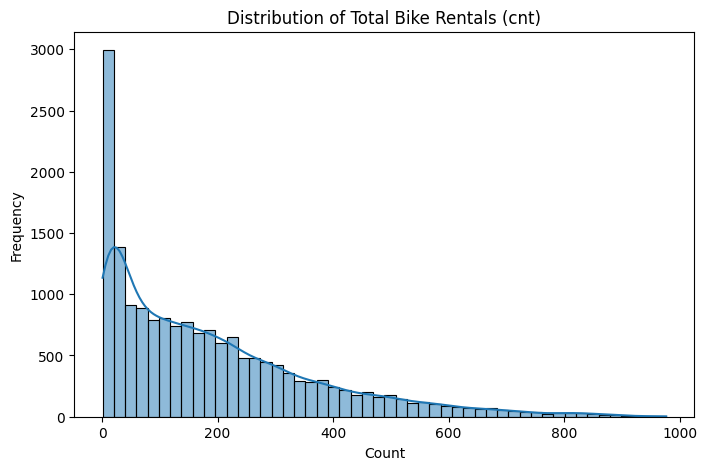

In [14]:
# Plot distribution of total bike rentals
plt.figure(figsize=(8,5))
sns.histplot(df['cnt'], bins=50, kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

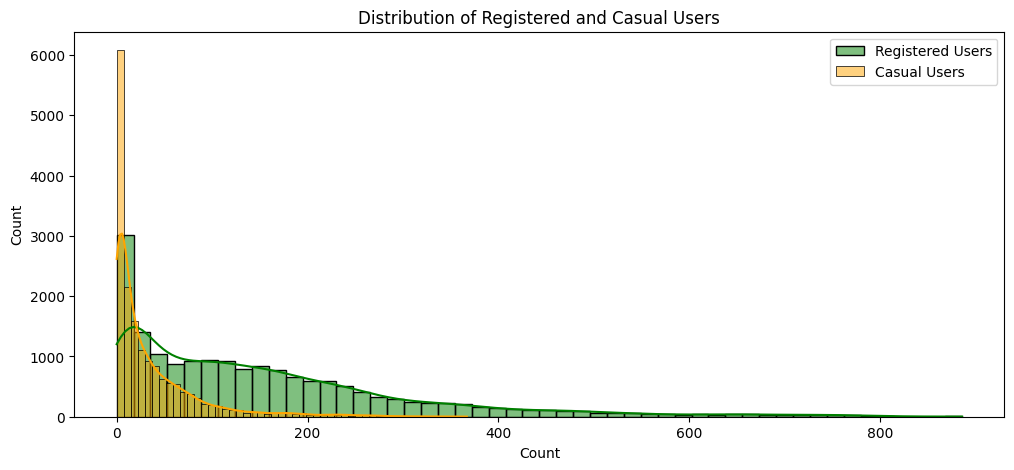

In [15]:
# Distribution of registered and casual users
plt.figure(figsize=(12,5))
sns.histplot(df['registered'], bins=50, color='green', label='Registered Users', kde=True)
sns.histplot(df['casual'], bins=50, color='orange', label='Casual Users', kde=True)
plt.title('Distribution of Registered and Casual Users')
plt.xlabel('Count')
plt.legend()
plt.show()

<Axes: xlabel='temp', ylabel='Count'>

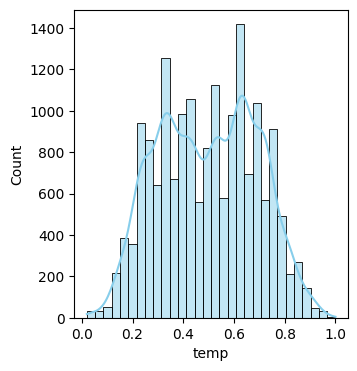

In [16]:
# Distribution of weather features
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['temp'], bins=30, kde=True, color='skyblue')

<Axes: xlabel='hum', ylabel='Count'>

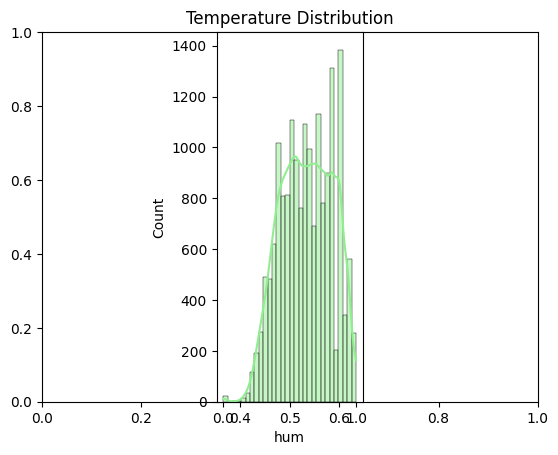

In [17]:
plt.title('Temperature Distribution')
plt.subplot(1,3,2)
sns.histplot(df['hum'], bins=30, kde=True, color='lightgreen')

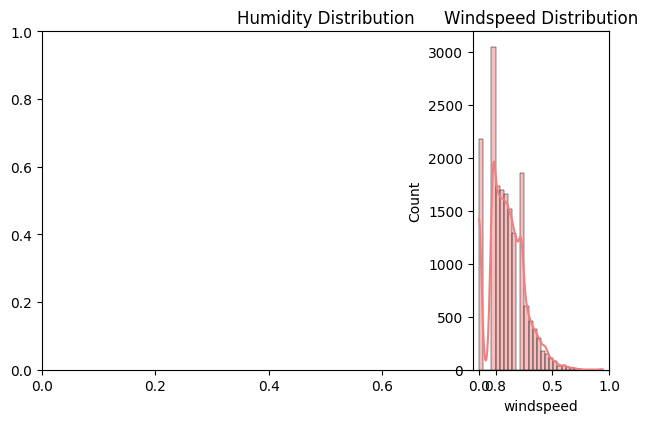

In [18]:
plt.title('Humidity Distribution')
plt.subplot(1,3,3)
sns.histplot(df['windspeed'], bins=30, kde=True, color='lightcoral')
plt.title('Windspeed Distribution')
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-1680788508.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df, ci=None)


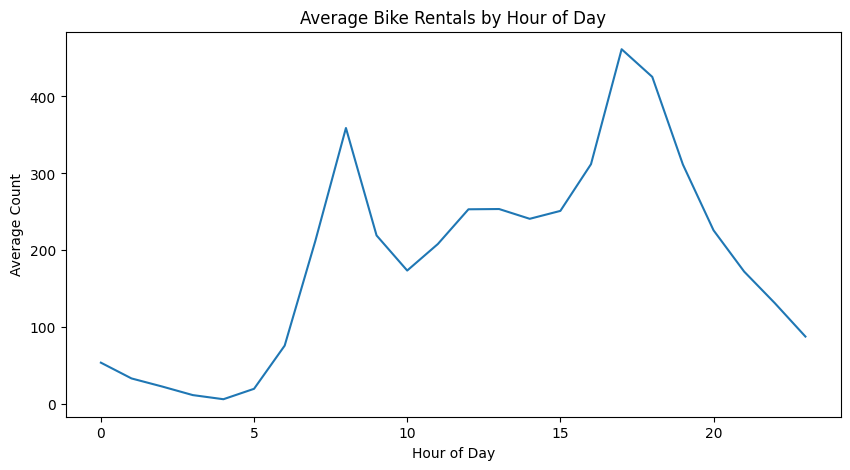

In [19]:
# Relationship between hour of day and bike rentals
plt.figure(figsize=(10,5))
sns.lineplot(x='hr', y='cnt', data=df, ci=None)
plt.title('Average Bike Rentals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.show()

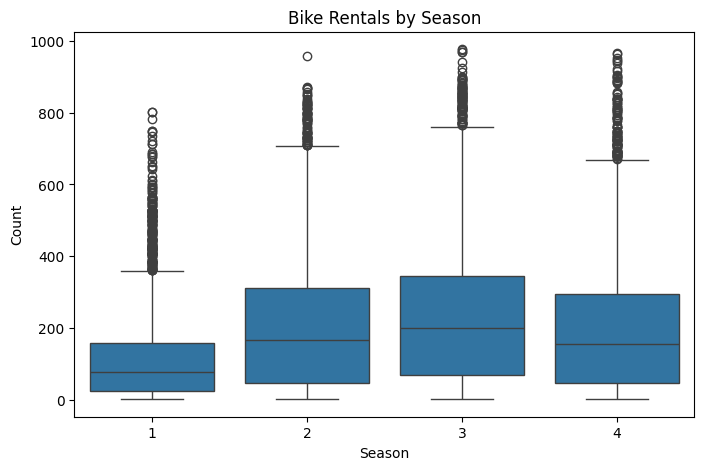

In [20]:
# Bike rentals by season
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

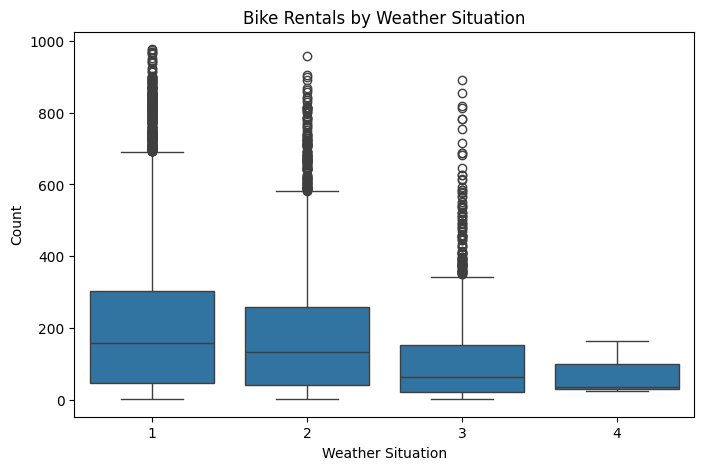

In [21]:
# Bike rentals by weather situation
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()

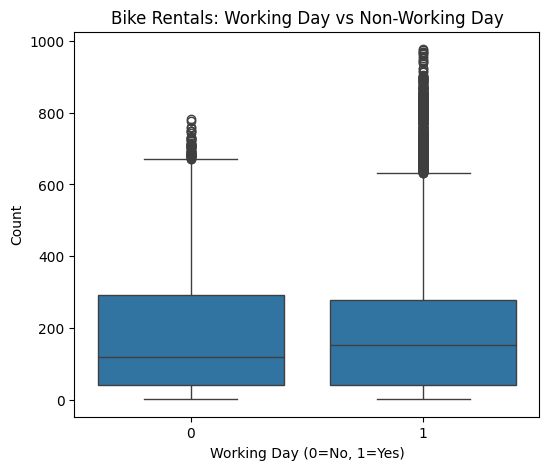

In [22]:
# Bike rentals on working day vs non-working day
plt.figure(figsize=(6,5))
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Bike Rentals: Working Day vs Non-Working Day')
plt.xlabel('Working Day (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

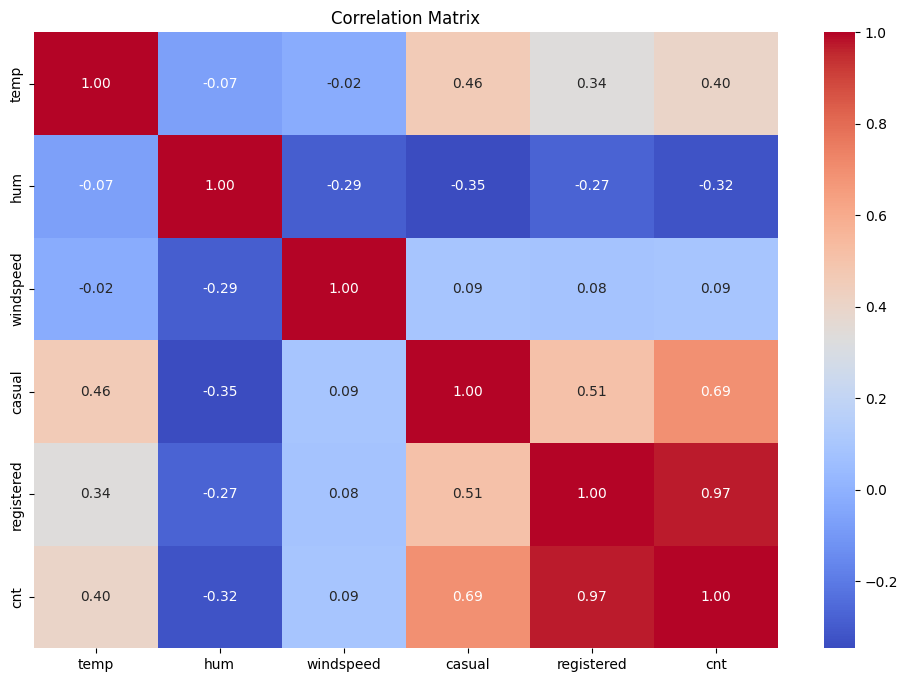

In [23]:
# Correlation heatmap of numeric features
plt.figure(figsize=(12,8))
corr = df[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

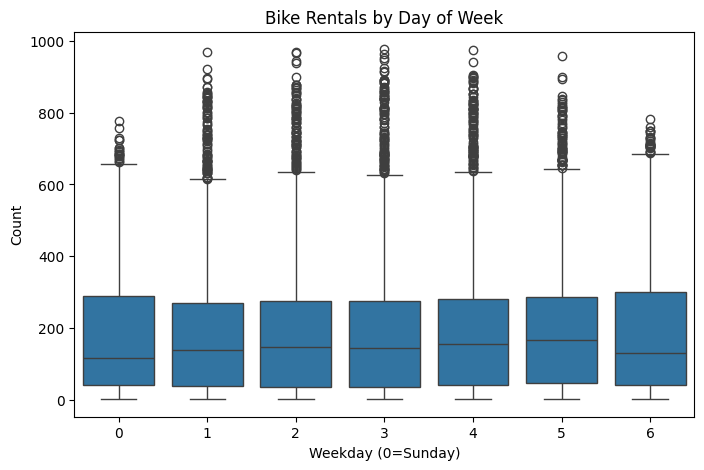

In [24]:
# Rentals by day of week
plt.figure(figsize=(8,5))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Bike Rentals by Day of Week')
plt.xlabel('Weekday (0=Sunday)')
plt.ylabel('Count')
plt.show()

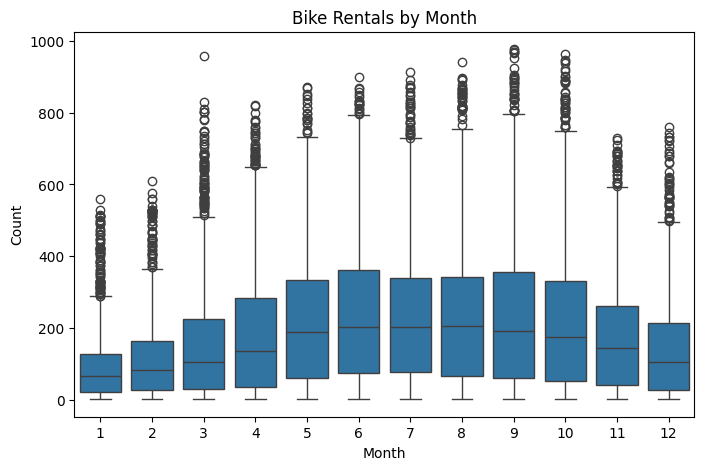

In [25]:
# Rentals by month
plt.figure(figsize=(8,5))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [26]:
# Feature Engineering

In [27]:
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
df[categorical_cols] = df[categorical_cols].astype('category')

In [28]:
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

In [29]:
print(df.head())

   instant      dteday yr mnth hr holiday weekday workingday  temp   atemp  \
0        1  2011-01-01  0    1  0       0       6          0  0.24  0.2879   
1        2  2011-01-01  0    1  1       0       6          0  0.22  0.2727   
2        3  2011-01-01  0    1  2       0       6          0  0.22  0.2727   
3        4  2011-01-01  0    1  3       0       6          0  0.24  0.2879   
4        5  2011-01-01  0    1  4       0       6          0  0.24  0.2879   

   ...  windspeed  casual  registered  cnt  season_2  season_3  season_4  \
0  ...        0.0       3          13   16     False     False     False   
1  ...        0.0       8          32   40     False     False     False   
2  ...        0.0       5          27   32     False     False     False   
3  ...        0.0       3          10   13     False     False     False   
4  ...        0.0       0           1    1     False     False     False   

   weathersit_2  weathersit_3  weathersit_4  
0         False         Fals

In [30]:
# Outlier Detection and Normalization

In [31]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [32]:
# Z-score method
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 372


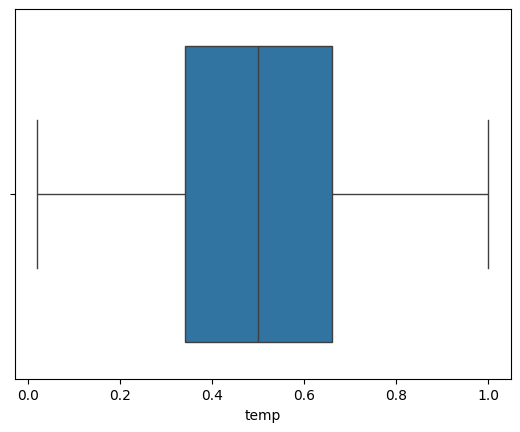

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['temp'])
plt.show()

In [34]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[numerical_cols]))

In [35]:
z_scores

array([[1.33464759, 1.0932806 , 0.9473725 , 1.55388851, 0.95633924],
       [1.4385164 , 1.18173227, 0.89553869, 1.55388851, 0.82402209],
       [1.4385164 , 1.18173227, 0.89553869, 1.55388851, 0.8681278 ],
       ...,
       [1.23077877, 1.26960201, 0.14113744, 0.21169121, 0.54836135],
       [1.23077877, 1.18173227, 0.34847267, 0.45609864, 0.70824458],
       [1.23077877, 1.18173227, 0.11803159, 0.45609864, 0.77440315]])

In [36]:
# keeping rows where all z-scores ≤ 3
filtered_entries = (z_scores < 3).all(axis=1)

In [37]:
# Removing outliers
df_clean = df[filtered_entries].copy()

In [38]:
print(f"Original shape: {df.shape}")

Original shape: (17379, 21)


In [39]:
print(f"after removing outliers: {df_clean.shape}")

after removing outliers: (17007, 21)


In [40]:
df_clean = df[~outliers]

In [41]:
# Scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [42]:
print(df_clean[numerical_cols].describe())

               temp         atemp           hum     windspeed           cnt
count  17007.000000  17007.000000  17007.000000  17007.000000  17007.000000
mean       0.494936      0.474093      0.630642      0.187085    180.852355
std        0.192371      0.171581      0.191148      0.117765    166.364547
min        0.020000      0.000000      0.080000      0.000000      1.000000
25%        0.340000      0.333300      0.480000      0.104500     39.000000
50%        0.500000      0.484800      0.630000      0.164200    139.000000
75%        0.640000      0.621200      0.790000      0.253700    274.000000
max        1.000000      0.984800      1.000000      0.552200    733.000000


# MODEL TRAINING

In [43]:
# 1. LINEAR REGRESSION

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
print(df.columns)

Index(['instant', 'dteday', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')


In [46]:
y = df['cnt']

In [51]:
df = df.drop(columns=['dteday'])

In [52]:
X = df.drop(columns=['cnt', 'casual', 'registered'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print("Training features shape:", X_train.shape)

Training features shape: (13903, 17)


In [55]:
print("Testing features shape:", X_test.shape)

Testing features shape: (3476, 17)


In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
print('R²:', r2_score(y_test, y_pred))

RMSE: 137.91186519142494
R²: 0.39935463466788435


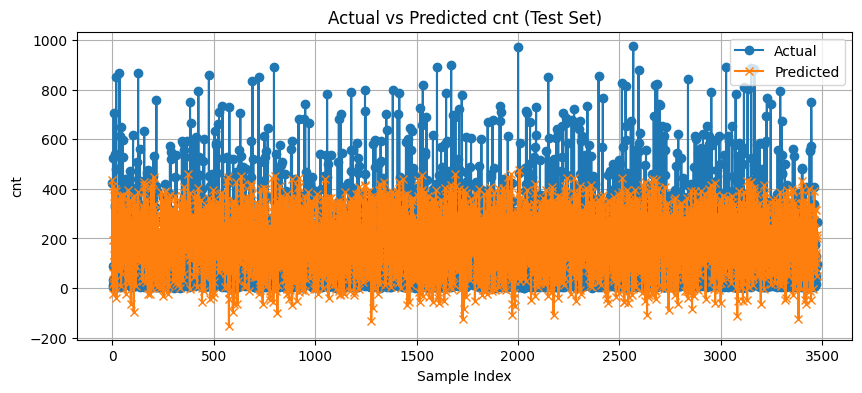

In [61]:
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Actual vs Predicted cnt (Test Set)")
plt.xlabel("Sample Index")
plt.ylabel("cnt")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Dicision tree regressior

In [63]:
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

In [64]:
dt_regressor = DecisionTreeRegressor(
    max_depth=10,             # limit the depth of the tree
    min_samples_split=5,      # minimum samples to split a node
    min_samples_leaf=3,       # minimum samples per leaf
    random_state=42
)

In [65]:
# Train the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                      random_state=42)

In [66]:
# Predict on test data
y_pred = dt_regressor.predict(X_test)

In [67]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [68]:
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 3366.82


In [69]:
print(f"R-squared (R2): {r2:.2f}")

R-squared (R2): 0.89


In [71]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 58.02


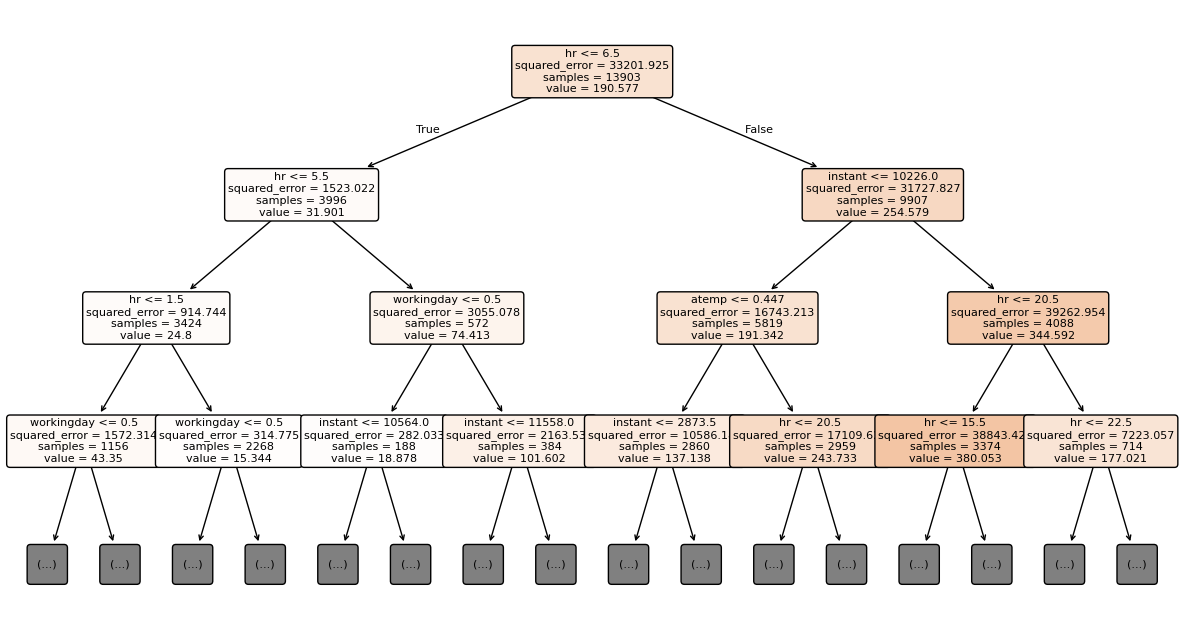

In [72]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
plot_tree(
    dt_regressor,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3
)
plt.show()

In [73]:
# Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)


In [76]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
# Predict on test data
y_pred = rf_regressor.predict(X_test)

In [78]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [79]:
print(f"Random Forest Regressor Mean Squared Error: {mse:.2f}")

Random Forest Regressor Mean Squared Error: 1660.27


In [80]:
print(f"Random Forest Regressor R-squared: {r2:.2f}")

Random Forest Regressor R-squared: 0.95


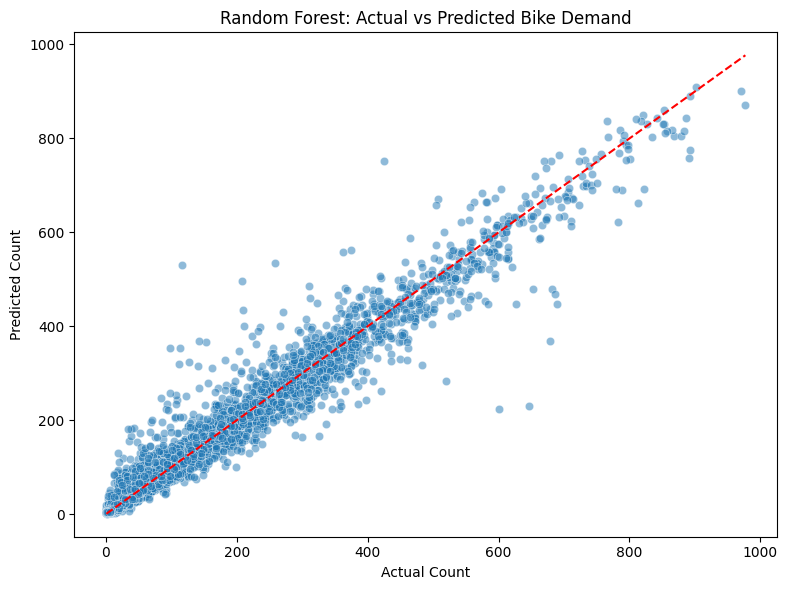

In [81]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Random Forest: Actual vs Predicted Bike Demand")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# MODEL EVALUATION

In [82]:
#1. Mean Squared Error (MSE)

In [83]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1660.27


In [86]:
#2. Root Mean Squared Error (RMSE)

In [87]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [88]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 40.75


In [89]:
#3. Mean Absolute Error (MAE)

In [90]:
from sklearn.metrics import mean_absolute_error

In [91]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 24.14


In [92]:
#4. R-squared (R²)

In [93]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

R-squared (R²): 0.95


# MODEL COMPARISON

In [94]:
# Models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
}

In [95]:
from sklearn.pipeline import Pipeline

In [97]:
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

In [98]:
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print(results_df)

               Model        RMSE         MAE        R²
2      Random Forest   40.746463   24.139174  0.947568
1      Decision Tree   59.230232   33.893556  0.889210
0  Linear Regression  137.911865  103.731808  0.399355


# CONCLUSION

The Random Forest Regressor (or Gradient Boosting) is recommended for predicting hourly bike rental demand due to its strong performance in RMSE, MAE, and R². These models can support operational decisions, such as allocating bikes to stations based on demand patterns.